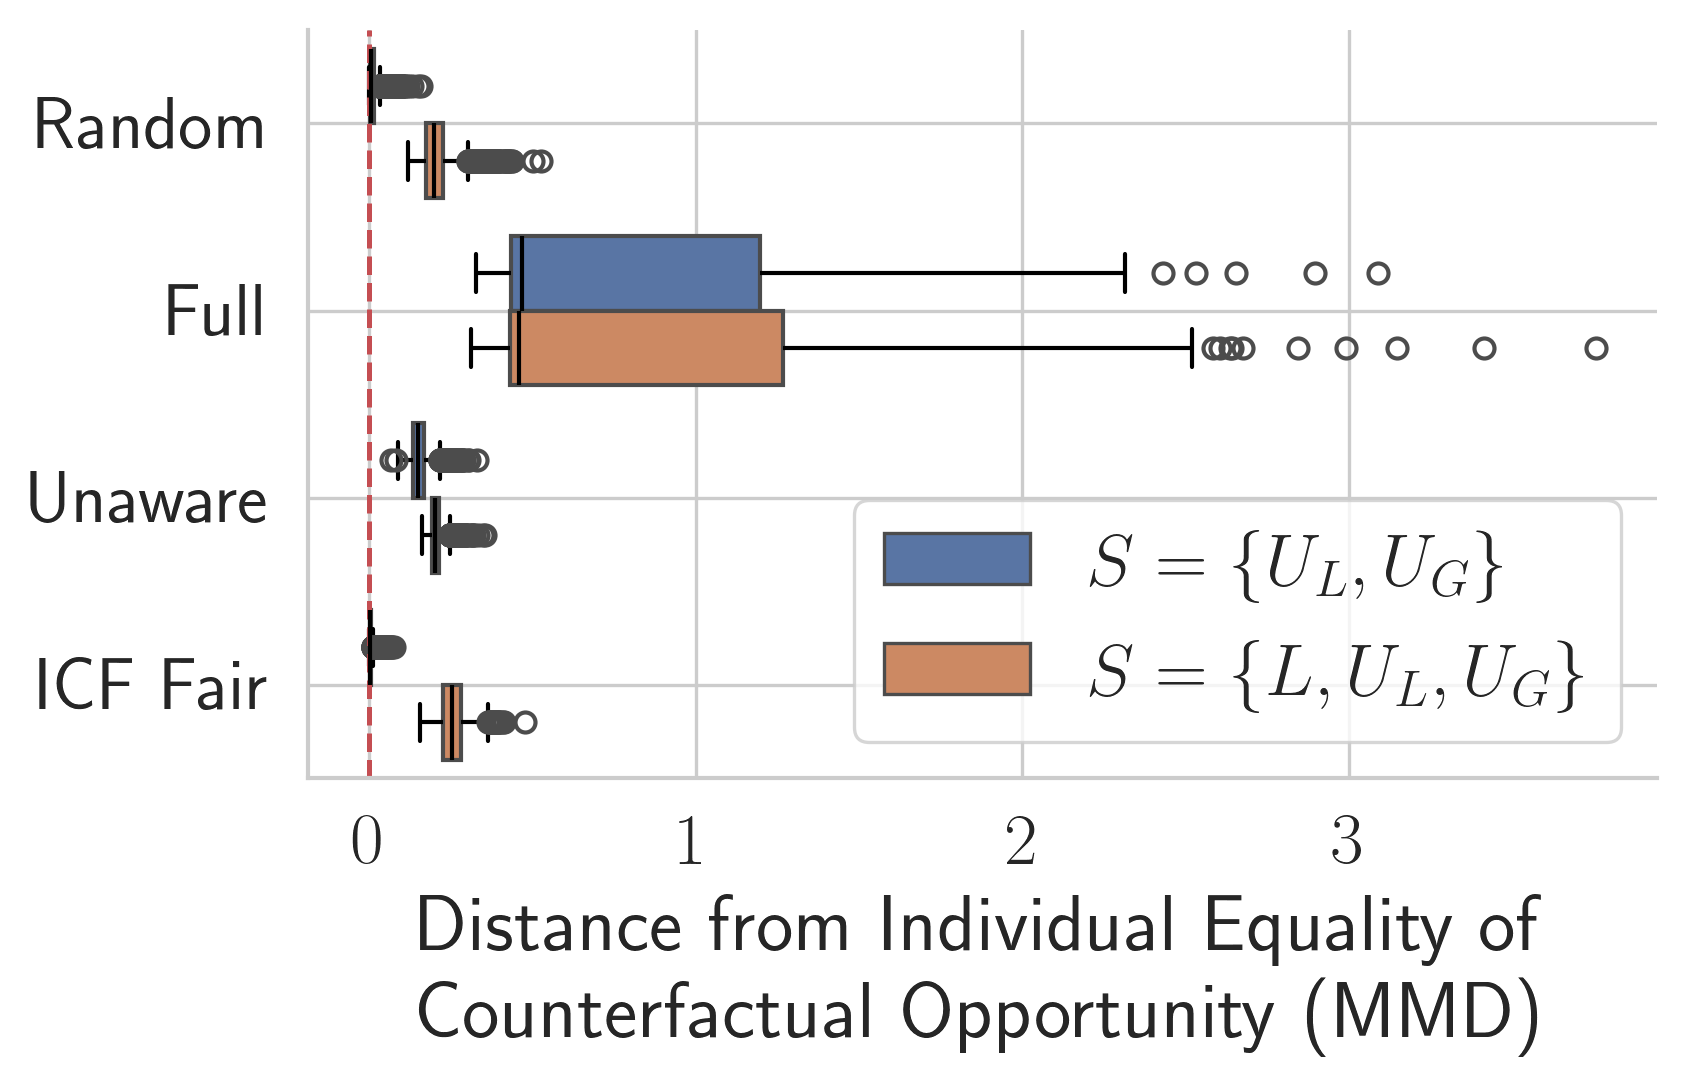

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with_lsat_df = pd.read_csv('results/law_LSAT,U_LSAT,U_GPA,n=5000,nS=100,nL=1000.csv', index_col=0)
no_lsat_df = pd.read_csv('results/law_U_LSAT,U_GPA,n=5000,nS=100,nL=1000.csv', index_col=0)
no_lsat_df['S'] = "$S=\{U_L, U_G\}$"
with_lsat_df['S'] = "$S=\{L, U_L, U_G\}$"
law_df = pd.concat([no_lsat_df, with_lsat_df], axis=0)
law_df = law_df.melt(id_vars=['S'], var_name='Model', value_name='Distance')
law_df.Distance = law_df.Distance.abs()

plt.figure(dpi=300, figsize=(6, 4))
boxplot_settings = {
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
sns.set(rc={'text.usetex' : True}, font_scale=2, context='paper')
sns.set_style('whitegrid')
sns.boxplot(y='Model', x='Distance', hue='S', orient='h', data=law_df, **boxplot_settings)
sns.despine(right = True)
plt.axvline(x=0, linestyle='dashed', color='r')
plt.xlabel('Distance from Individual Equality of\nCounterfactual Opportunity (MMD)')
plt.ylabel('')
plt.legend(title='', loc='lower right')
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)
plt.tight_layout()
plt.show()